In [2]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
## ROI pooled embeddings (7x7x256)

## ROI pool layer of COCO trained FRCNN-FPN, using GT boxes in ROI pooling (7x7x256)

In [3]:
embed_classwise = {}
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/GTfeatures"

In [3]:
with open('classwise_GTfeatures.pkl', 'rb') as f:
        embed_classwise = pickle.load(f)

In [4]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in embed_classwise.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

del embed_classwise

In [5]:
all_embeddings.shape,class_labels.shape

((78050, 12544), (78050,))

In [6]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2000)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
#tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
#tsne_embeddings = tsne.fit_transform(pca_embeddings)

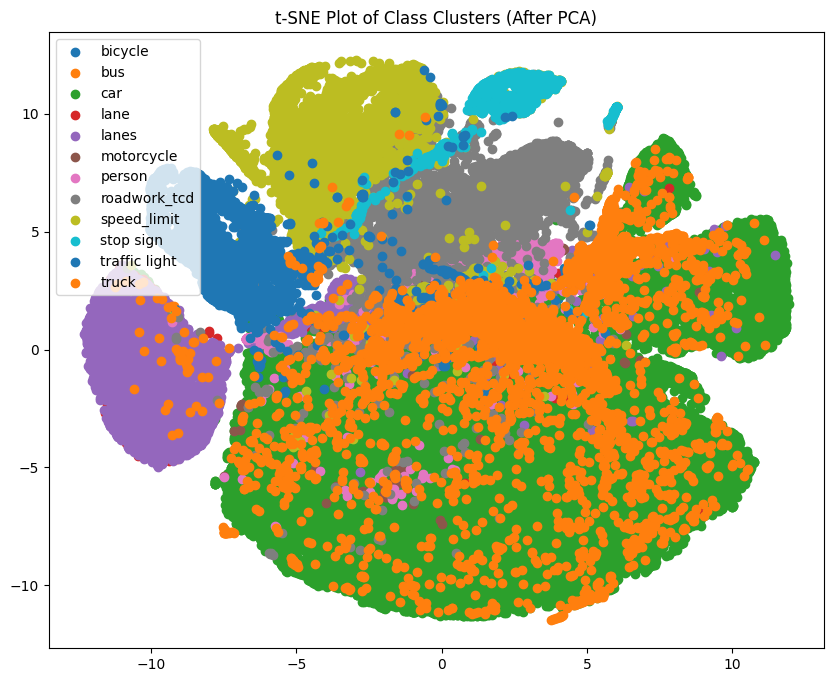

In [6]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend([
                        "bicycle","bus","car","lane","lanes","motorcycle","person",
                        "roadwork_tcd","speed_limit","stop sign", "traffic light",
                        "truck"
                          ])
plt.show()

## Train linear SVM to as measure of seperability

In [7]:
from sklearn import svm

In [8]:
del all_embeddings
pca_embeddings.shape

(78050, 2000)

In [9]:
clf = svm.LinearSVC()
clf.fit(pca_embeddings, class_labels)

/home/vaibhav/Desktop/detectron2/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
y_pred = clf.predict(pca_embeddings)
y = class_labels

# Calculate and display training metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Training Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


## Penultimate layer of COCO trained FRCNN-FPN, using GT boxes in ROI pooling (1024)

In [4]:
embed_classwise = {}    
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/GTfeatures/pooled"

In [5]:
for im in os.listdir(fea_path):
    x = {}
    with open(os.path.join(fea_path,im), 'rb') as f:
        x = pickle.load(f)
    idx = 0
    for i in x['preds']:
        if embed_classwise.get(i.item()) == None:
            embed_classwise[i.item()] = [x['features'][idx].detach().cpu().numpy()]
        else:
            embed_classwise[i.item()].append(x['features'][idx].detach().cpu().numpy())
        idx += 1

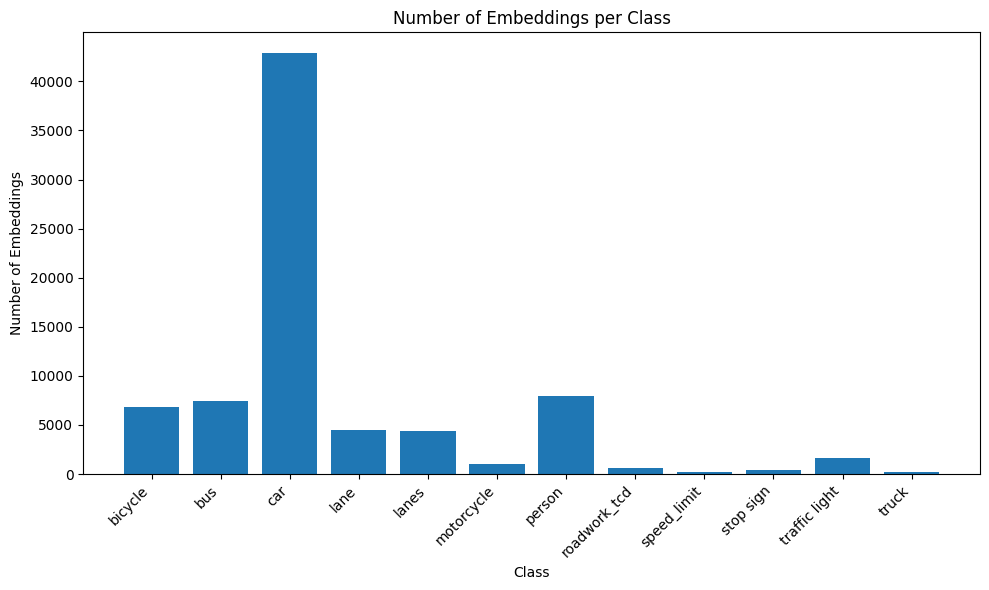

In [13]:
class_counts = {class_label: len(embeddings) for class_label, embeddings in embed_classwise.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
classes = [
                        "bicycle","bus","car","lane","lanes","motorcycle","person",
                        "roadwork_tcd","speed_limit","stop sign", "traffic light",
                        "truck"
                          ]
plt.bar(classes, class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Embeddings')
plt.title('Number of Embeddings per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in embed_classwise.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

del embed_classwise


In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

In [7]:
all_embeddings.shape,class_labels.shape

((78042, 1024), (78042,))

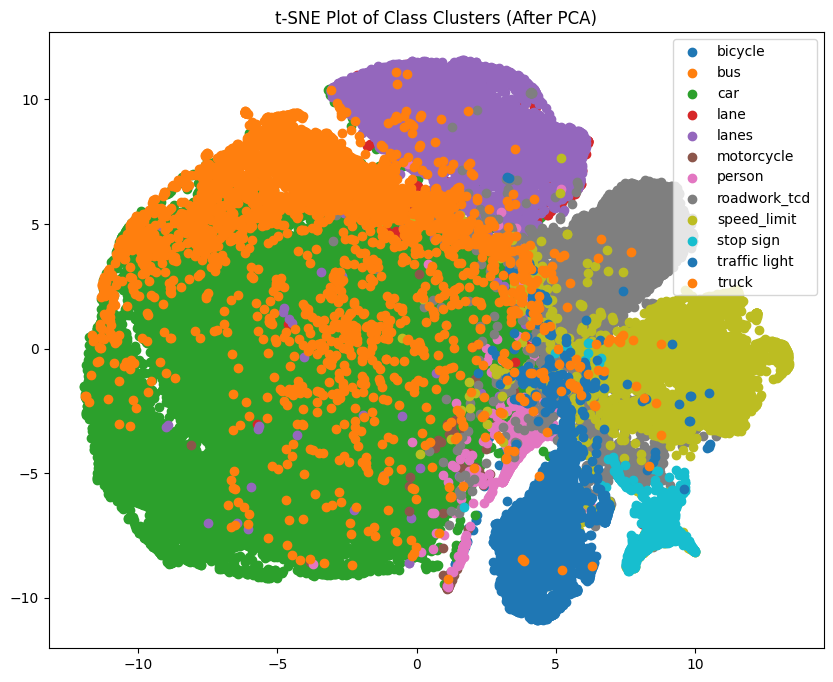

In [12]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend([
                        "bicycle","bus","car","lane","lanes","motorcycle","person",
                        "roadwork_tcd","speed_limit","stop sign", "traffic light",
                        "truck"
                          ])
plt.show()

## Train linear SVM to as measure of seperability

In [8]:
from sklearn import svm

In [9]:
clf = svm.LinearSVC()
clf.fit(all_embeddings, class_labels)

/home/vaibhav/Desktop/detectron2/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
y_pred = clf.predict(all_embeddings)
y = class_labels

# Calculate and display training metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Training Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [15]:
y_pred

array([8, 8, 8, ..., 0, 0, 0])